<center>Заметка 4. Деревья решения и др.</center>
<center>курса <q>Введение в машинное обучение</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.11</center>

<center>Анотация</center>
<p>
Деревья решений. Ближайшего соседа. Используем библиотеку scikit-learn
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

import graphviz
from sklearn import tree

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame( iris.data )
df.columns = iris.feature_names
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6               0.2
12                 4.8               3.0                1.4               0.1
13                 4.3               3.0                1.1               0.1
14                 5.8               4.0                1.2               0.2
15                 5.7               4.4                1.5               0.4
16                 5.4               3.9                1.3               0.4
17                 5.1               3.5                1.4               0.3
18                 5.7               3.8                1.7               0.3
19                 5.1               3.8                1.5               0.3
20                 5.4               3.4                1.7               0.2
21                 5.1               3.7                1.5               0.4
22                 4.6               3.6                1.0               0.2
23                 5.1               3.3                1.7               0.5
24                 4.8               3.4                1.9               0.2
25                 5.0               3.0                1.6               0.2
26                 5.0               3.4                1.6               0.4
27                 5.2               3.5                1.5               0.2
28                 5.2               3.4                1.4               0.2
29                 4.7               3.2                1.6               0.2
..                 ...               ...                ...               ...
120                6.9               3.2                5.7               2.3
121                5.6               2.8                4.9               2.0
122                7.7               2.8                6.7               2.0
123                6.3               2.7                4.9               1.8
124                6.7               3.3                5.7               2.1
125                7.2               3.2                6.0               1.8
126                6.2               2.8                4.8               1.8
127                6.1               3.0                4.9               1.8
128                6.4               2.8                5.6               2.1
129                7.2               3.0                5.8               1.6
130                7.4               2.8                6.1               1.9
131                7.9               3.8                6.4               2.0
132                6.4               2.8                5.6               2.2
133                6.3               2.8                5.1               1.5
134                6.1               2.6                5.6               1.4
135                7.7               3.0                6.1               2.3
136                6.3               3.4                5.6               2.4
137                6.4               3.1                5.5               1.8
138                6.0               3.0                4.8               1.8
139                6.9     

In [6]:
clf1 = DecisionTreeClassifier(max_depth=1)
clf2 = DecisionTreeClassifier(max_depth=2)
clf3 = DecisionTreeClassifier(max_depth=3)
clf4 = DecisionTreeClassifier(max_depth=5)

In [7]:
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

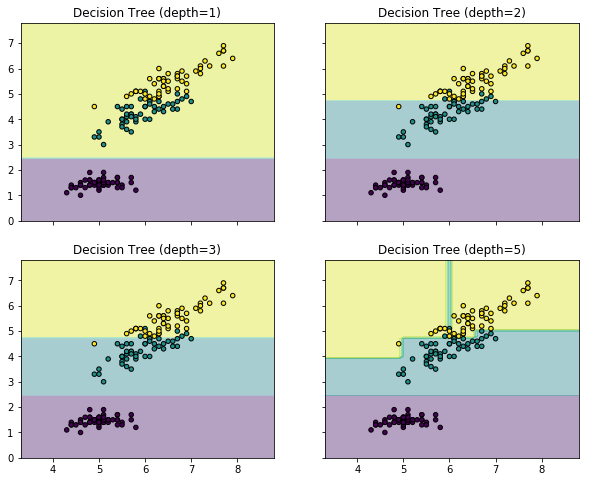

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['Decision Tree (depth=1)', 'Decision Tree (depth=2)',
                         'Decision Tree (depth=3)', 'Decision Tree (depth=5)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [9]:
dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 

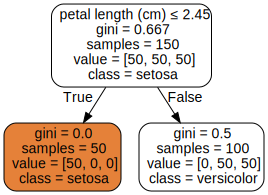

In [10]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

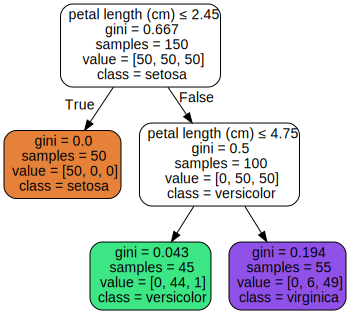

In [11]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

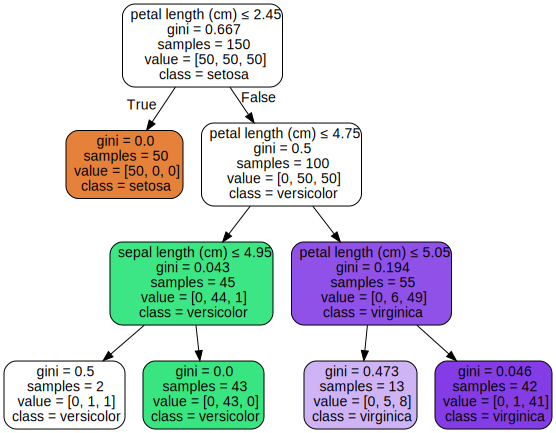

In [12]:
dot_data = tree.export_graphviz(clf3, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

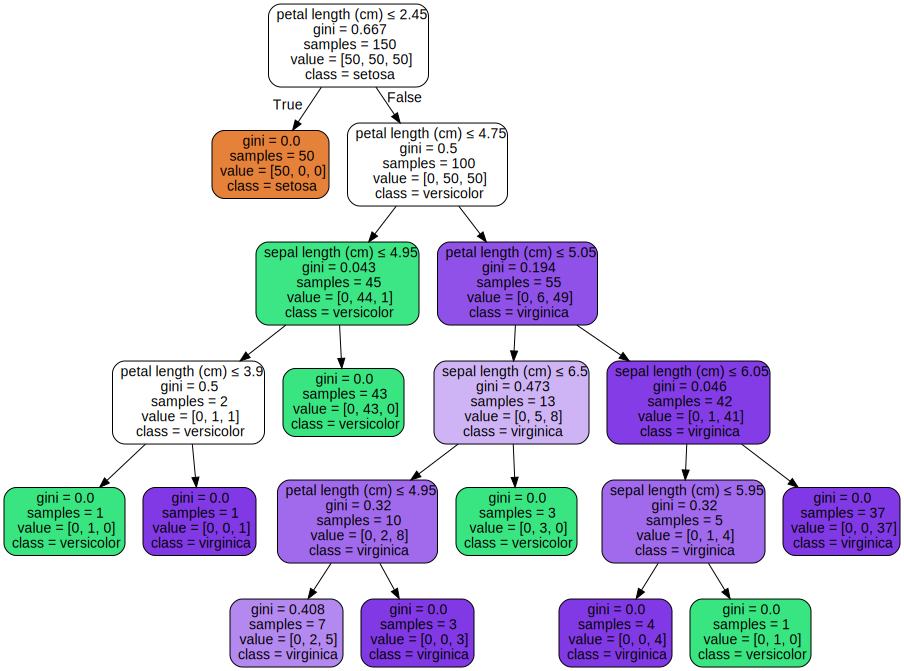

In [13]:
dot_data = tree.export_graphviz(clf4, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [14]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

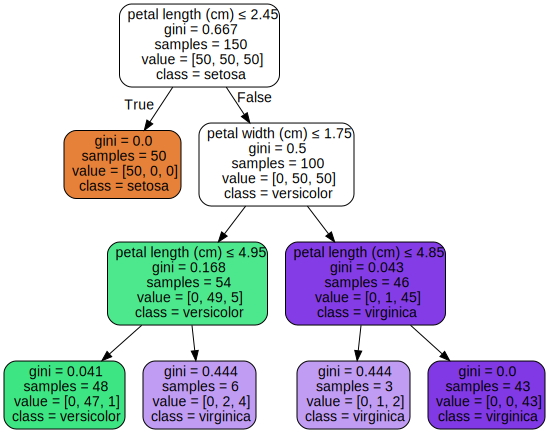

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [16]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

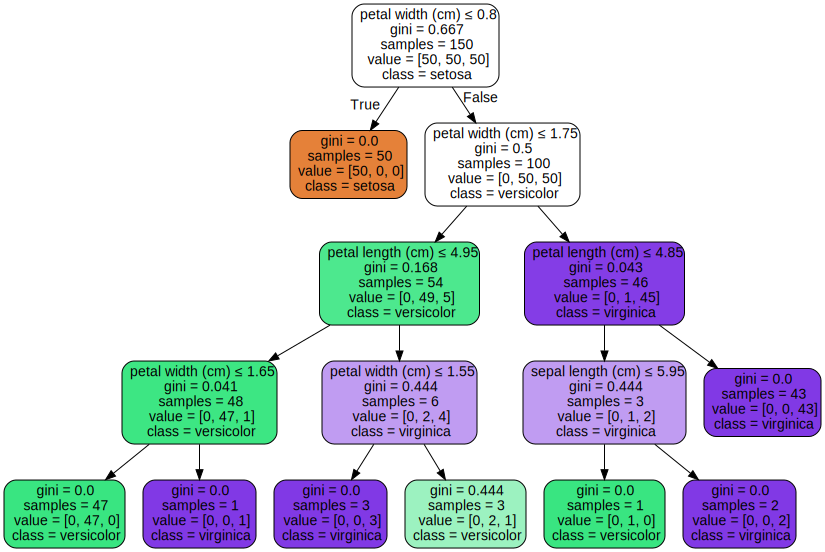

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [18]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.15)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.15, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

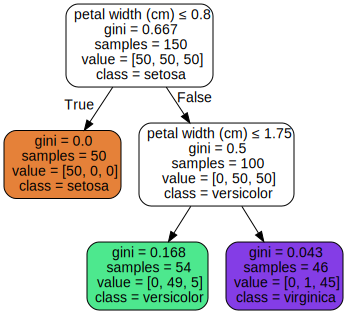

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [20]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
feature_names = iris.feature_names#clf.tree_.feature
threshold = clf.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("Стрктура бинарного дерева имеет %s узлов и следущий вид:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%sузел=%s конечный." % (node_depth[i] * "\t", i))
    else:
        print("%sузел=%s проверка: перейти к узлу %s если %s <= %s иначе к узлу %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature_names[i],
                 threshold[i],
                 children_right[i],
                 ))
print()


Стрктура бинарного дерева имеет 5 узлов и следущий вид:
узел=0 проверка: перейти к узлу 1 если sepal length (cm) <= 0.800000011920929 иначе к узлу 2.
	узел=1 конечный.
	узел=2 проверка: перейти к узлу 3 если petal length (cm) <= 1.75 иначе к узлу 4.
		узел=3 конечный.
		узел=4 конечный.



In [21]:
sample = 33

In [22]:
node_indicator = clf.decision_path( [iris.data[ sample ]] )
node_indicator

<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [23]:
leave_id = clf.apply( [iris.data[ sample ]] )
leave_id[0]

1

In [24]:
class_id = clf.predict( [iris.data[ sample ]] )
class_id, iris.target_names[class_id]

(array([0]), array(['setosa'], dtype='<U10'))

In [25]:
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[0]:
                                    node_indicator.indptr[0 + 1]]

print('Используемые правила для предсказания %s: ' % sample)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    if (iris.data[sample, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("узел дерева решений %s : ( фича %s, (= %s) %s %s)"
          % (node_id,
             feature[node_id],
             iris.data[sample, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

Используемые правила для предсказания 33: 
узел дерева решений 1 : ( фича -2, (= 1.4) > -2.0)


In [26]:
clf.score(iris.data, iris.target)

0.96

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( iris.data, iris.target, test_size=0.15)

In [28]:
X_train.shape[0]/iris.data.shape[0], X_test.shape[0]/iris.data.shape[0]

(0.8466666666666667, 0.15333333333333332)

In [29]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.15)
clf.fit( X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.15, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
clf.score( X_test, y_test )

0.8695652173913043

In [31]:
clf = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01 )
clf.fit( X_train, y_train )
clf.score( X_test, y_test )

0.8695652173913043

<b>Лассо регрессия</b>

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [33]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [34]:
import pandas as pd
df = pd.DataFrame(boston['data'])
df

0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87  0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14  0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14  0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14  0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14  0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14  0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14  0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14  0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14  0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14  0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14  0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14  0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14  0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14  0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14  0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14  0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14  0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14  0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...  ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10  0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10  0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10  0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10  0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10  0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10  0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10  0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10  0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10  0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10  0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10  0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10  0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74  0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74  0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74  0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74  0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74  0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69  0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69  0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69  0.0  0.585  5.670   28.8  2.7986   6.0  391.0   
496   0

In [35]:
df.columns = boston['feature_names']
df

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [36]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [37]:
targ = pd.DataFrame( boston.target )
targ.columns = ["Цена"]
targ

Цена
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
10   15.0
11   18.9
12   21.7
13   20.4
14   18.2
15   19.9
16   23.1
17   17.5
18   20.2
19   18.2
20   13.6
21   19.6
22   15.2
23   14.5
24   15.6
25   13.9
26   16.6
27   14.8
28   18.4
29   21.0
..    ...
476  16.7
477  12.0
478  14.6
479  21.4
480  23.0
481  23.7
482  25.0
483  21.8
484  20.6
485  21.2
486  19.1
487  20.6
488  15.2
489   7.0
490   8.1
491  13.6
492  20.1
493  21.8
494  24.5
495  23.1
496  19.7
497  18.3
498  21.2
499  17.5
500  16.8
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]

In [38]:
targ["Цена"][1]

21.6

In [39]:
pd.concat([df, targ], axis=1) 

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

In [40]:
from sklearn.linear_model import Lasso
las = Lasso( 0.95)

In [41]:
X_train, X_test, y_train, y_test = train_test_split( boston.data, boston.target, test_size=0.15)
las.fit( X_train, y_train )

Lasso(alpha=0.95, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
las.score( X_train, y_train )

0.7039796490622132

In [43]:
las.score( X_test, y_test )

0.6800820288881564

In [44]:
las.coef_

array([-6.60302033e-02,  4.37445786e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.11143949e+00,  1.06164045e-03, -6.88378197e-01,
        2.00499266e-01, -1.16324372e-02, -7.52971157e-01,  7.47979040e-03,
       -6.47627672e-01])

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(  ) #max_depth=5, min_impurity_decrease=0.01, random_state=0

In [46]:
regressor.fit( boston.data, boston.target )

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [47]:
X_train, X_test, y_train, y_test = train_test_split( boston.data, boston.target, test_size=0.15)

In [48]:
regressor.fit( X_train, y_train )

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
regressor.score( X_train, y_train )

1.0

In [50]:
regressor.score( X_test, y_test )

0.8698912616229756

In [51]:
pred = regressor.predict( X_test )
pred

array([23.7, 29.1, 33.4, 19.4, 18.3, 27.5, 21.8, 21.7, 19.2, 28.7, 48.5,
       19.3, 12.5, 19.5, 23.1, 17.1, 17.4, 16.7, 23.7, 26.7, 34.9, 48.8,
       50. , 18.3, 22.2, 18.9, 13.1, 14.8, 11.5, 22.6, 30.1, 19. , 32.4,
       23.2, 13.4, 19.2, 15.6, 15.6, 36.2,  7.2, 26.4, 13.1, 28.7, 24. ,
       21.4, 21.2, 14.9,  8.3, 26.5,  8.3, 25.1,  7.2, 27. , 13.4, 24. ,
       22.2, 22.8, 38.7, 42.3, 23.1, 21. , 14.9,  7.2, 21.7, 27.1, 25. ,
       22.9, 30.8, 33.4,  7.2, 19.4, 33.1, 23.7, 20.5, 21.4, 50. ])

In [52]:
y_test

array([25.3, 24.1, 35.4, 23.4, 19.3, 30.1, 19.9, 21.2, 19.4, 23.6, 50. ,
       19.7, 15.1, 16. , 22.9, 17.6, 18.4, 10.9, 24.2, 31.5, 34.9, 50. ,
       50. , 23.1, 23.9, 16.6, 18.4, 15.2, 12.8, 29.1, 29. , 15.6, 32. ,
       16.1, 13.4, 19.6, 13.9, 14.6, 25.2, 10.5, 18.6, 14.1, 23.9, 21.2,
       25. , 18.9, 17.8,  8.8, 22. , 10.9, 23.3, 10.2, 25. , 14.9, 18.2,
       23.9, 20.2, 43.8, 44. , 16.5, 18.4, 14.6, 12.1, 19.9, 24.4, 24.6,
       21.4, 30.1, 33.3,  8.5, 18. , 29.4, 23.5, 21.4, 20.6, 43.1])

(array([ 2.,  4.,  7., 14., 21., 15.,  7.,  1.,  3.,  2.]),
 array([0.59504132, 0.6887482 , 0.78245508, 0.87616195, 0.96986883,
        1.06357571, 1.15728258, 1.25098946, 1.34469634, 1.43840321,
        1.53211009]),
 <a list of 10 Patch objects>)

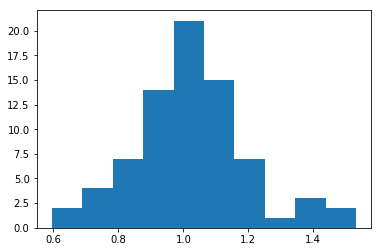

In [53]:
plt.hist( pred/y_test )

In [54]:
np.std(pred / y_test)

0.17617657143740723

In [55]:
np.std(pred - y_test)

3.331974907874248

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, boston.data, boston.target, cv=10)

array([ 0.54666729,  0.59044073, -1.45687285,  0.40456359,  0.65648541,
        0.39547472,  0.22922286,  0.36025836, -2.13574704,  0.17980798])

In [57]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( max_depth=5, min_impurity_decrease=0.01 ) #random_state=0

In [58]:
regressor.fit( boston.data, boston.target )

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.01,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
X_train, X_test, y_train, y_test = train_test_split( boston.data, boston.target, test_size=0.15)

In [60]:
regressor.fit( X_train, np.log(y_train) )

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.01,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
regressor.score( X_train, np.log(y_train) )

0.6993837946164134

In [62]:
regressor.score( X_test, np.log(y_test) )

0.6283914392130323

In [63]:
pred = regressor.predict( X_test )
pred

array([2.42322041, 2.81949328, 2.81949328, 2.42322041, 3.5790192 ,
       3.5790192 , 2.81949328, 2.81949328, 3.11438922, 2.42322041,
       3.11438922, 3.5790192 , 3.11438922, 3.11438922, 2.81949328,
       3.11438922, 2.42322041, 3.11438922, 3.5790192 , 3.5790192 ,
       3.5790192 , 3.5790192 , 3.11438922, 3.11438922, 3.11438922,
       3.11438922, 3.11438922, 3.11438922, 3.5790192 , 3.11438922,
       3.11438922, 3.11438922, 3.11438922, 3.11438922, 2.81949328,
       2.81949328, 3.11438922, 3.5790192 , 3.5790192 , 3.11438922,
       3.11438922, 3.11438922, 2.42322041, 2.81949328, 3.11438922,
       2.42322041, 3.11438922, 2.81949328, 3.11438922, 3.11438922,
       3.5790192 , 3.11438922, 3.11438922, 2.81949328, 3.11438922,
       3.11438922, 3.11438922, 3.11438922, 2.81949328, 2.81949328,
       3.5790192 , 3.5790192 , 3.11438922, 3.11438922, 2.42322041,
       3.5790192 , 3.11438922, 3.5790192 , 3.5790192 , 3.11438922,
       2.42322041, 3.11438922, 3.11438922, 2.81949328, 2.81949

In [64]:
np.log(y_test)

array([2.67414865, 2.63905733, 2.81540872, 2.2512918 , 3.91202301,
       3.28091122, 2.74727091, 2.97041447, 3.17387846, 2.14006616,
       2.4765384 , 3.91202301, 3.21084365, 3.34638915, 2.63188884,
       3.08190997, 2.54160199, 3.41772668, 3.59731226, 3.09104245,
       3.35689712, 3.56671182, 3.02529108, 3.19047635, 3.21084365,
       3.06805294, 3.91202301, 3.12676054, 3.91202301, 3.32862669,
       2.96527307, 3.314186  , 3.10009229, 3.16547505, 2.99573227,
       2.96527307, 2.80336038, 3.58351894, 3.21887582, 3.13113691,
       3.0155349 , 3.36729583, 2.00148   , 2.73436751, 3.32862669,
       2.6461748 , 3.13983262, 3.06805294, 3.11794991, 3.02042489,
       3.49953328, 3.0301337 , 3.09557761, 2.90690106, 3.06339092,
       3.0056826 , 3.14415228, 3.16547505, 2.61006979, 2.62466859,
       3.61899333, 3.63495111, 2.90142159, 3.20680324, 3.00071982,
       3.39785848, 2.9601051 , 3.28466357, 3.8815638 , 3.10009229,
       2.87919846, 3.08648664, 2.99071973, 3.07731226, 2.94443

(array([ 1.,  1.,  1., 10., 13., 22., 17.,  7.,  3.,  1.]),
 array([-0.79763378, -0.65408532, -0.51053686, -0.3669884 , -0.22343994,
        -0.07989148,  0.06365698,  0.20720544,  0.3507539 ,  0.49430236,
         0.63785082]),
 <a list of 10 Patch objects>)

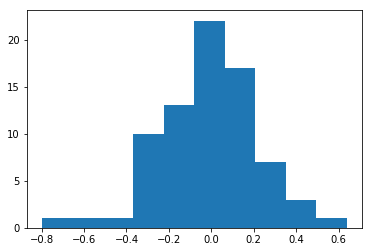

In [65]:
plt.hist(pred - np.log(y_test) )

(array([ 2.,  5., 14., 23., 16.,  8.,  5.,  1.,  1.,  1.]),
 array([0.45039343, 0.59459503, 0.73879662, 0.88299822, 1.02719981,
        1.17140141, 1.315603  , 1.4598046 , 1.60400619, 1.74820779,
        1.89240938]),
 <a list of 10 Patch objects>)

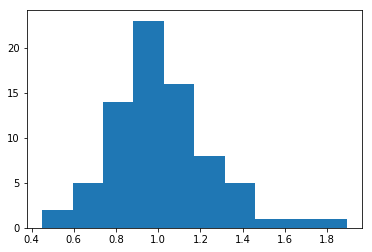

In [66]:
plt.hist(np.exp(pred - np.log(y_test)))

In [67]:
#from sklearn.datasets import fetch_california_housing
#housing = fetch_california_housing()

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [70]:
X_train, X_test, y_train, y_test = train_test_split( iris.data, iris.target, test_size=0.15)

In [71]:
neigh.fit( X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [72]:
neigh.score( X_train, y_train )

0.9763779527559056

In [73]:
neigh.score( X_test, y_test )

0.9565217391304348

In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score( neigh, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [75]:
for n in range(1,5):
    neigh = KNeighborsClassifier(n_neighbors=n)
    print(np.mean(cross_val_score( neigh, iris.data, iris.target, cv=10)))

0.96
0.9533333333333334
0.9666666666666666
0.9666666666666666


In [76]:
from sklearn.neighbors import RadiusNeighborsClassifier
rad = RadiusNeighborsClassifier( radius = 0.75 )
cross_val_score( rad, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [77]:
for r in np.arange(0.75, 5, 0.15):
    rad = RadiusNeighborsClassifier( radius = r )
    print(r, np.mean(cross_val_score( rad, iris.data, iris.target, cv=10)))

0.75 0.9666666666666668
0.9 0.9533333333333334
1.05 0.9533333333333334
1.2000000000000002 0.9400000000000001
1.35 0.9200000000000002
1.5 0.8866666666666667
1.6500000000000001 0.8933333333333333
1.8000000000000003 0.8866666666666667
1.9500000000000002 0.8933333333333333
2.1 0.9
2.25 0.8800000000000001
2.4000000000000004 0.8666666666666668
2.5500000000000003 0.8800000000000001
2.7 0.8933333333333333
2.8500000000000005 0.8733333333333333
3.0000000000000004 0.82
3.1500000000000004 0.7866666666666666
3.3000000000000003 0.7466666666666666
3.45 0.7
3.6000000000000005 0.6333333333333332
3.7500000000000004 0.5800000000000001
3.9000000000000004 0.56
4.050000000000001 0.52
4.200000000000001 0.47999999999999987
4.3500000000000005 0.43999999999999995
4.5 0.4133333333333334
4.65 0.38000000000000006
4.800000000000001 0.36000000000000004
4.950000000000001 0.33333333333333337


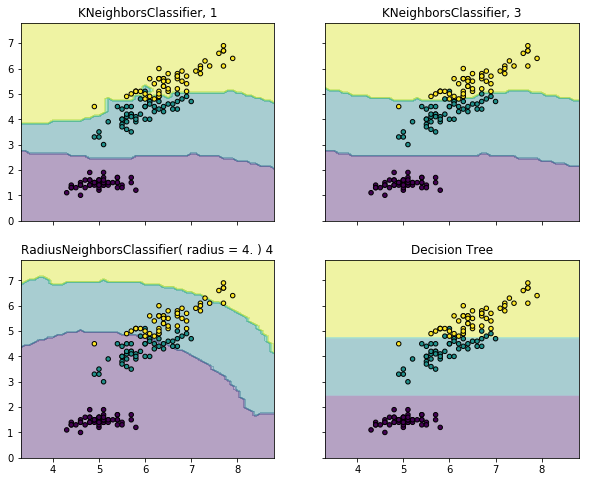

In [78]:
X = iris.data[:, [0, 2]]
y = iris.target

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3),
                         RadiusNeighborsClassifier( radius = 4. ), DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.1)],
                        ['KNeighborsClassifier, 1', 'KNeighborsClassifier, 3',
                         'RadiusNeighborsClassifier( radius = 4. ) 4', 'Decision Tree']):

    clf.fit( X, y )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [79]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( max_depth=5, min_impurity_decrease=0.01 ) #random_state=0

In [80]:
regressor.fit( boston.data, boston.target )

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.01,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
X_train, X_test, y_train, y_test = train_test_split( boston.data, boston.target, test_size=0.15)

In [82]:
regressor.fit( X_train, np.log(y_train) )

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.01,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
regressor.score( X_train, np.log(y_train) )

0.7038988391585246

In [84]:
regressor.score( X_test, np.log(y_test) )

0.5879761258737521

In [85]:
pred = regressor.predict( X_test )
pred

array([3.53986065, 3.53986065, 3.08085185, 3.08085185, 3.08085185,
       3.53986065, 3.08085185, 2.29529697, 2.75531767, 3.08085185,
       3.08085185, 3.53986065, 3.08085185, 3.53986065, 3.08085185,
       3.53986065, 3.08085185, 2.75531767, 3.53986065, 2.75531767,
       2.75531767, 3.53986065, 3.08085185, 2.29529697, 3.08085185,
       3.53986065, 2.29529697, 2.29529697, 3.08085185, 3.08085185,
       3.53986065, 3.08085185, 3.08085185, 3.53986065, 3.08085185,
       2.75531767, 3.08085185, 2.75531767, 3.08085185, 2.75531767,
       3.08085185, 3.08085185, 3.08085185, 2.29529697, 3.08085185,
       3.08085185, 3.08085185, 3.53986065, 3.53986065, 3.53986065,
       3.08085185, 3.08085185, 3.53986065, 3.08085185, 3.08085185,
       3.08085185, 3.53986065, 2.29529697, 3.08085185, 2.29529697,
       3.08085185, 3.08085185, 2.75531767, 3.08085185, 3.08085185,
       3.08085185, 3.53986065, 3.53986065, 2.75531767, 2.75531767,
       2.75531767, 3.08085185, 3.08085185, 2.29529697, 3.53986

In [86]:
np.log(y_test)

array([3.5085559 , 3.77963382, 3.03974916, 2.77881927, 2.93916192,
       3.55820113, 3.18221184, 3.314186  , 2.49320545, 3.21084365,
       3.42751469, 3.33220451, 3.06339092, 3.5055574 , 3.15273602,
       3.5085559 , 3.58905912, 2.9601051 , 3.49650756, 2.66722821,
       2.87919846, 3.56671182, 3.02529108, 2.84490938, 3.09104245,
       3.63495111, 2.59525471, 2.00148   , 3.01062089, 3.10009229,
       3.41114771, 3.35689712, 3.05400118, 3.56104608, 2.83907846,
       2.93385687, 3.11351531, 2.44234704, 2.96527307, 2.8507065 ,
       2.77881927, 3.33576958, 3.32862669, 2.81540872, 3.16547505,
       3.00071982, 3.13549422, 3.8286414 , 3.44041809, 3.54673969,
       2.94443898, 2.97552957, 3.34990409, 2.93916192, 3.13983262,
       3.39450839, 3.26575941, 2.73436751, 3.13983262, 2.57261223,
       3.19458313, 3.12676054, 2.78501124, 3.44998755, 3.40452517,
       2.8094027 , 3.48737508, 3.40452517, 2.87919846, 2.46809953,
       2.72129543, 3.16968558, 3.28091122, 2.2617631 , 3.31418

(array([ 1.,  0.,  0.,  3.,  2., 10., 11., 23., 13., 13.]),
 array([-1.01888904, -0.88570307, -0.7525171 , -0.61933114, -0.48614517,
        -0.3529592 , -0.21977323, -0.08658727,  0.0465987 ,  0.17978467,
         0.31297064]),
 <a list of 10 Patch objects>)

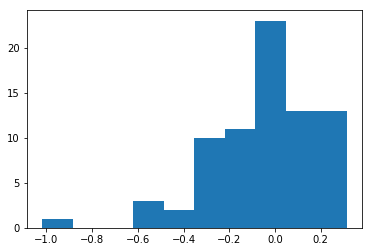

In [87]:
plt.hist(pred - np.log(y_test))